# Finance Podcasts - Analysing the Episodes

### This will be an attempt to analyse the episodes of personal finance podcasts data downloaded using the [Spotify](https://developer.spotify.com/) API  

In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
print("Done")

Done


In [2]:
df = pd.read_csv('fin_episodes.csv', index_col=0)
df.head()

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,2624052,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,5rlksOLniypAgBEkebMkoo
1,55Fkq503PHqrk2sDFgSJkJ,2568620,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,5rlksOLniypAgBEkebMkoo
2,6mPZv163rYpSGxeU22jZMx,2126968,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,5rlksOLniypAgBEkebMkoo
3,6MmCicD7bBdyCX4eiGceCj,2214922,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,5rlksOLniypAgBEkebMkoo
4,0x5QHf5oHj0kszmhZ4mYSM,1625287,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,5rlksOLniypAgBEkebMkoo


### Some data pre-processing and visualisation

In [3]:
df['ep_duration'] = (df['ep_duration']/60000).astype(int) #convert episode duration to minutes
df

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,5rlksOLniypAgBEkebMkoo
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,5rlksOLniypAgBEkebMkoo
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,5rlksOLniypAgBEkebMkoo
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,5rlksOLniypAgBEkebMkoo
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,5rlksOLniypAgBEkebMkoo
...,...,...,...,...,...,...,...
27849,3Ze8QJfFVtOq7K4t5MMdVN,36,2020-04-03,Almost Abstract Outdoor News - 3rd April 2020,We Get Outdoors decided to take things to a ne...,https://p.scdn.co/mp3-preview/694912c7e74c56aa...,51l9jW0oK963nzZyWrNrKU
27850,33g0vk9HRLErnQZqagv9fB,57,2020-03-31,How I survived 3 Naked and Afraid Challenges w...,"In this episode, EJ and Mark discuss how to su...",https://p.scdn.co/mp3-preview/bde07774ad150a70...,51l9jW0oK963nzZyWrNrKU
27851,6JfpyNA2Eoq49Kg3P3wUP8,12,2020-03-30,COVID 19 - Get Outdoors Safely with Rob Yates,In this first episode We Get Outdoors co-found...,https://p.scdn.co/mp3-preview/2174eff0157e07e4...,51l9jW0oK963nzZyWrNrKU
27852,4jJLYKenuKJ39sxCTz6XRG,66,2020-03-24,How To Sail around the World with Sailing Magi...,This episode is brought to you by the We Get O...,https://p.scdn.co/mp3-preview/c86d6ea6d929b98e...,51l9jW0oK963nzZyWrNrKU


In [4]:
df['ep_duration'].describe() #summary stats for the episode duration column

count    27854.000000
mean        32.262260
std         22.059156
min          0.000000
25%         14.000000
50%         30.000000
75%         46.000000
max        234.000000
Name: ep_duration, dtype: float64

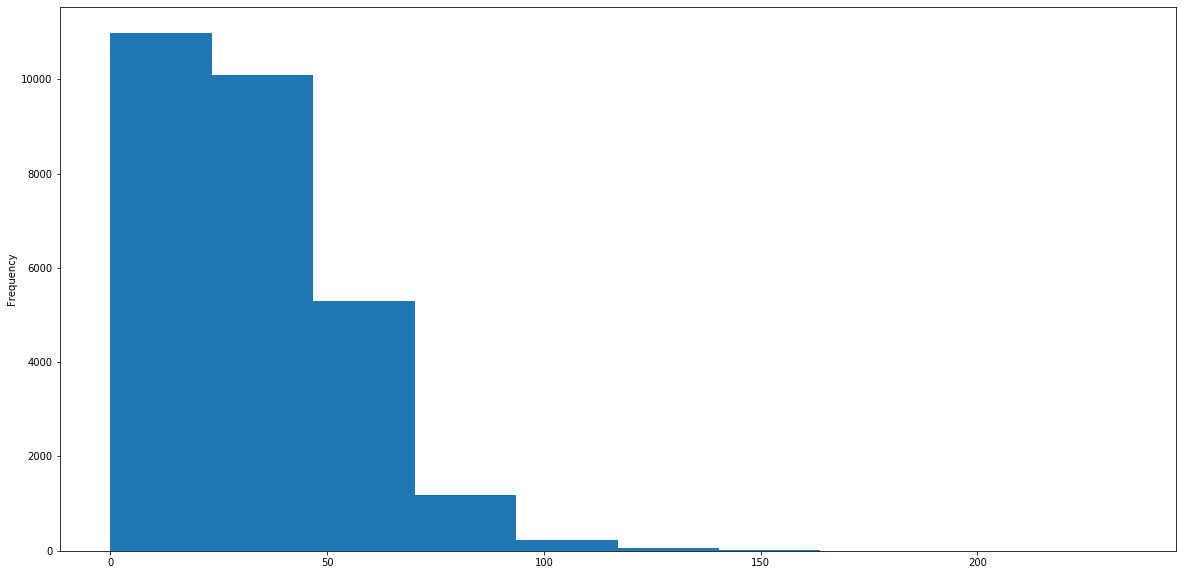

In [5]:
plt.figure(figsize=(20,10))
df['ep_duration'].plot(kind='hist')
plt.savefig('eps_duration.png'); #distribution of episode lengths at this stage

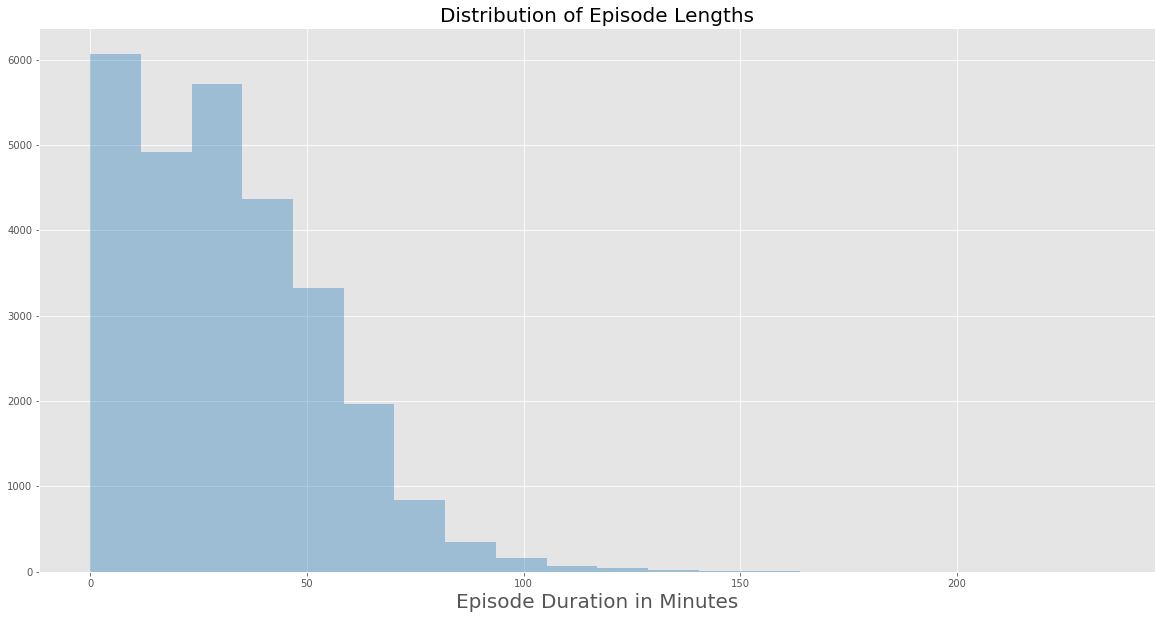

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.distplot(df['ep_duration'],kde=False, bins=20,color='#3182bd')
plt.xlabel('Episode Duration in Minutes',fontsize=20)
plt.title('Distribution of Episode Lengths',fontsize=20)
plt.savefig('epi_duration.png');

### The episodes need to be mapped with the show names. The show data will be read in again.

In [7]:
df_fin = pd.read_csv('en_podcasts.csv',index_col=0)
df_fin.head(10)

,id,name,description,languages,publisher
2,5rlksOLniypAgBEkebMkoo,Rich Dad Radio Show: In-Your-Face Advice on In...,"Beat conventional advice on personal finance, ...",['en'],The Rich Dad Radio Network
3,54VydTdMDHkfqPqzlwRJFa,Listen Money Matters - Free your inner financi...,Honest and uncensored - this is not your fathe...,['en'],ListenMoneyMatters.com | Andrew Fiebert and Ma...
5,6o8lC0CcRlIclZsbkEOaRL,Optimal Finance Daily,Why bother searching for the best blogs about ...,['en'],Dan | Optimal Living Daily
7,3oW8SnmePemy5pOsTTvQjY,Self Help for Life Podcast: Self-Improvement |...,Paul Thomas from the Self Help for Life blog s...,['en-GB'],"Paul Thomas : Clinical Hypnotherapist, Life an..."
8,49an3JD6uAaqEw5qQS8tie,My Personal Finances PodCat,PodCat is a weekly financial podcast helping y...,['en'],My Personal Finances
12,08IF2pM2RjjZ6jxafHnmPp,Radical Personal Finance,"Joshua J Sheats, MSFS, CFP®, CLU®, ChFC®, CASL...",['en-US'],Joshua Sheats
13,5hwcwChU0bWy1EFBNul7ld,Why Didn't They Teach Me This In School - Mone...,This podcast focuses on learning how to effect...,['en'],Cary Siegel
17,3iwRYmT3VIYrGC9NdRv2ya,The Meaningful Money Personal Finance Podcast,Pete Matthew discusses and explains all aspect...,['en'],Pete Matthew
21,1OUBkO5jLr3xNL2CSQffKM,The Scope of Practice Podcast for Business and...,"Dr. Brent W. Lacey, M.D. teaches healthcare pr...",['en-US'],Brent Lacey : physician : personal finance : b...
22,4i7qGU4QdWzUAW7r1eikTr,Dev Raga - Personal Finance Podcasts,Dev Raga is a Melbourne (Australia) based podc...,['en'],Dev Raga


In [8]:
fmap = df_fin.groupby('id')['name'].apply(list).to_dict()

In [9]:
df['show_id'] = df['show_id'].map(fmap)

In [10]:
df.head(10)

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,[Rich Dad Radio Show: In-Your-Face Advice on I...
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,[Rich Dad Radio Show: In-Your-Face Advice on I...
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,[Rich Dad Radio Show: In-Your-Face Advice on I...
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,[Rich Dad Radio Show: In-Your-Face Advice on I...
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,[Rich Dad Radio Show: In-Your-Face Advice on I...
5,4xHvhJQ8c5QDxrHEs9iFqE,46,2020-06-24,How to Become an Entrepreneur During a Crisis,Most people are trained to avoid mistakes. Rat...,https://p.scdn.co/mp3-preview/6acec7c1fc9d62a6...,[Rich Dad Radio Show: In-Your-Face Advice on I...
6,7hVfSKX5f38xb7NLrSprIm,41,2020-06-17,The Original Internet Godfather: From FBI’s Mo...,Online crime often succeeds because of failure...,https://p.scdn.co/mp3-preview/cfc3b9e3277177f3...,[Rich Dad Radio Show: In-Your-Face Advice on I...
7,564sKNjrbxAC3GavOimrEd,42,2020-06-15,How to Prepare for the Future and Avoid Being ...,As the global financial crisis spreads and the...,https://p.scdn.co/mp3-preview/0011802fef2b2d13...,[Rich Dad Radio Show: In-Your-Face Advice on I...
8,3ZiYQqVRMGmyUAo2rQS996,33,2020-06-10,Can the U.S. print its way out of financial di...,The Fed has been printing trillions of dollars...,https://p.scdn.co/mp3-preview/261dbbb557d3e98d...,[Rich Dad Radio Show: In-Your-Face Advice on I...
9,3HWUOPphDByAH4BPuoy7gy,35,2020-06-03,Investing Outside the Central Bank,"The Federal Reserve, the United States central...",https://p.scdn.co/mp3-preview/6051373aef8a1284...,[Rich Dad Radio Show: In-Your-Face Advice on I...


In [11]:
#Fix the show name by removing the brackets and rename the column

df.rename(columns={'show_id':'show_name'}, inplace=True)
df.head(10)

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,[Rich Dad Radio Show: In-Your-Face Advice on I...
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,[Rich Dad Radio Show: In-Your-Face Advice on I...
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,[Rich Dad Radio Show: In-Your-Face Advice on I...
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,[Rich Dad Radio Show: In-Your-Face Advice on I...
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,[Rich Dad Radio Show: In-Your-Face Advice on I...
5,4xHvhJQ8c5QDxrHEs9iFqE,46,2020-06-24,How to Become an Entrepreneur During a Crisis,Most people are trained to avoid mistakes. Rat...,https://p.scdn.co/mp3-preview/6acec7c1fc9d62a6...,[Rich Dad Radio Show: In-Your-Face Advice on I...
6,7hVfSKX5f38xb7NLrSprIm,41,2020-06-17,The Original Internet Godfather: From FBI’s Mo...,Online crime often succeeds because of failure...,https://p.scdn.co/mp3-preview/cfc3b9e3277177f3...,[Rich Dad Radio Show: In-Your-Face Advice on I...
7,564sKNjrbxAC3GavOimrEd,42,2020-06-15,How to Prepare for the Future and Avoid Being ...,As the global financial crisis spreads and the...,https://p.scdn.co/mp3-preview/0011802fef2b2d13...,[Rich Dad Radio Show: In-Your-Face Advice on I...
8,3ZiYQqVRMGmyUAo2rQS996,33,2020-06-10,Can the U.S. print its way out of financial di...,The Fed has been printing trillions of dollars...,https://p.scdn.co/mp3-preview/261dbbb557d3e98d...,[Rich Dad Radio Show: In-Your-Face Advice on I...
9,3HWUOPphDByAH4BPuoy7gy,35,2020-06-03,Investing Outside the Central Bank,"The Federal Reserve, the United States central...",https://p.scdn.co/mp3-preview/6051373aef8a1284...,[Rich Dad Radio Show: In-Your-Face Advice on I...


In [12]:
df['show_name'] = df['show_name'].str[0]
df.head(10)

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
0,0ntJn4yJVV4umVjwnGKRgn,43,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,Rich Dad Radio Show: In-Your-Face Advice on In...
1,55Fkq503PHqrk2sDFgSJkJ,42,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,Rich Dad Radio Show: In-Your-Face Advice on In...
2,6mPZv163rYpSGxeU22jZMx,35,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,Rich Dad Radio Show: In-Your-Face Advice on In...
3,6MmCicD7bBdyCX4eiGceCj,36,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,Rich Dad Radio Show: In-Your-Face Advice on In...
4,0x5QHf5oHj0kszmhZ4mYSM,27,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,Rich Dad Radio Show: In-Your-Face Advice on In...
5,4xHvhJQ8c5QDxrHEs9iFqE,46,2020-06-24,How to Become an Entrepreneur During a Crisis,Most people are trained to avoid mistakes. Rat...,https://p.scdn.co/mp3-preview/6acec7c1fc9d62a6...,Rich Dad Radio Show: In-Your-Face Advice on In...
6,7hVfSKX5f38xb7NLrSprIm,41,2020-06-17,The Original Internet Godfather: From FBI’s Mo...,Online crime often succeeds because of failure...,https://p.scdn.co/mp3-preview/cfc3b9e3277177f3...,Rich Dad Radio Show: In-Your-Face Advice on In...
7,564sKNjrbxAC3GavOimrEd,42,2020-06-15,How to Prepare for the Future and Avoid Being ...,As the global financial crisis spreads and the...,https://p.scdn.co/mp3-preview/0011802fef2b2d13...,Rich Dad Radio Show: In-Your-Face Advice on In...
8,3ZiYQqVRMGmyUAo2rQS996,33,2020-06-10,Can the U.S. print its way out of financial di...,The Fed has been printing trillions of dollars...,https://p.scdn.co/mp3-preview/261dbbb557d3e98d...,Rich Dad Radio Show: In-Your-Face Advice on In...
9,3HWUOPphDByAH4BPuoy7gy,35,2020-06-03,Investing Outside the Central Bank,"The Federal Reserve, the United States central...",https://p.scdn.co/mp3-preview/6051373aef8a1284...,Rich Dad Radio Show: In-Your-Face Advice on In...


In [13]:
df.shape

(27854, 7)

In [14]:
#Let's take a look at unique episode counts for the shows now

ep_count = df['show_name'].value_counts()
ep_count

Optimal Finance Daily                  1225
The Clark Howard Podcast                902
Simple Programmer Podcast               803
Radical Personal Finance                800
Be Wealthy & Smart                      749
                                       ... 
Impact Financial Solutions                1
Casting Commerce                          1
Irish Personal Finance                    1
Anmol Mantra On Financial Planning        1
Financial Freedom Institute Podcast       1
Name: show_name, Length: 456, dtype: int64

### Filtering shows by episode counts and further

In [15]:
#And subset it further to the top 10 shows by episode count

ep_count[:10]

Optimal Finance Daily                                  1225
The Clark Howard Podcast                                902
Simple Programmer Podcast                               803
Radical Personal Finance                                800
Be Wealthy & Smart                                      749
The James Altucher Show                                 679
FT Money Show                                           653
Money Girl's Quick and Dirty Tips for a Richer Life     639
Motley Fool Answers                                     584
The Stacking Benjamins Show                             522
Name: show_name, dtype: int64

In [16]:
#Summary stats for episode numbers?

ep_count.describe()

count     456.000000
mean       61.083333
std       135.278100
min         1.000000
25%         6.000000
50%        16.000000
75%        45.000000
max      1225.000000
Name: show_name, dtype: float64

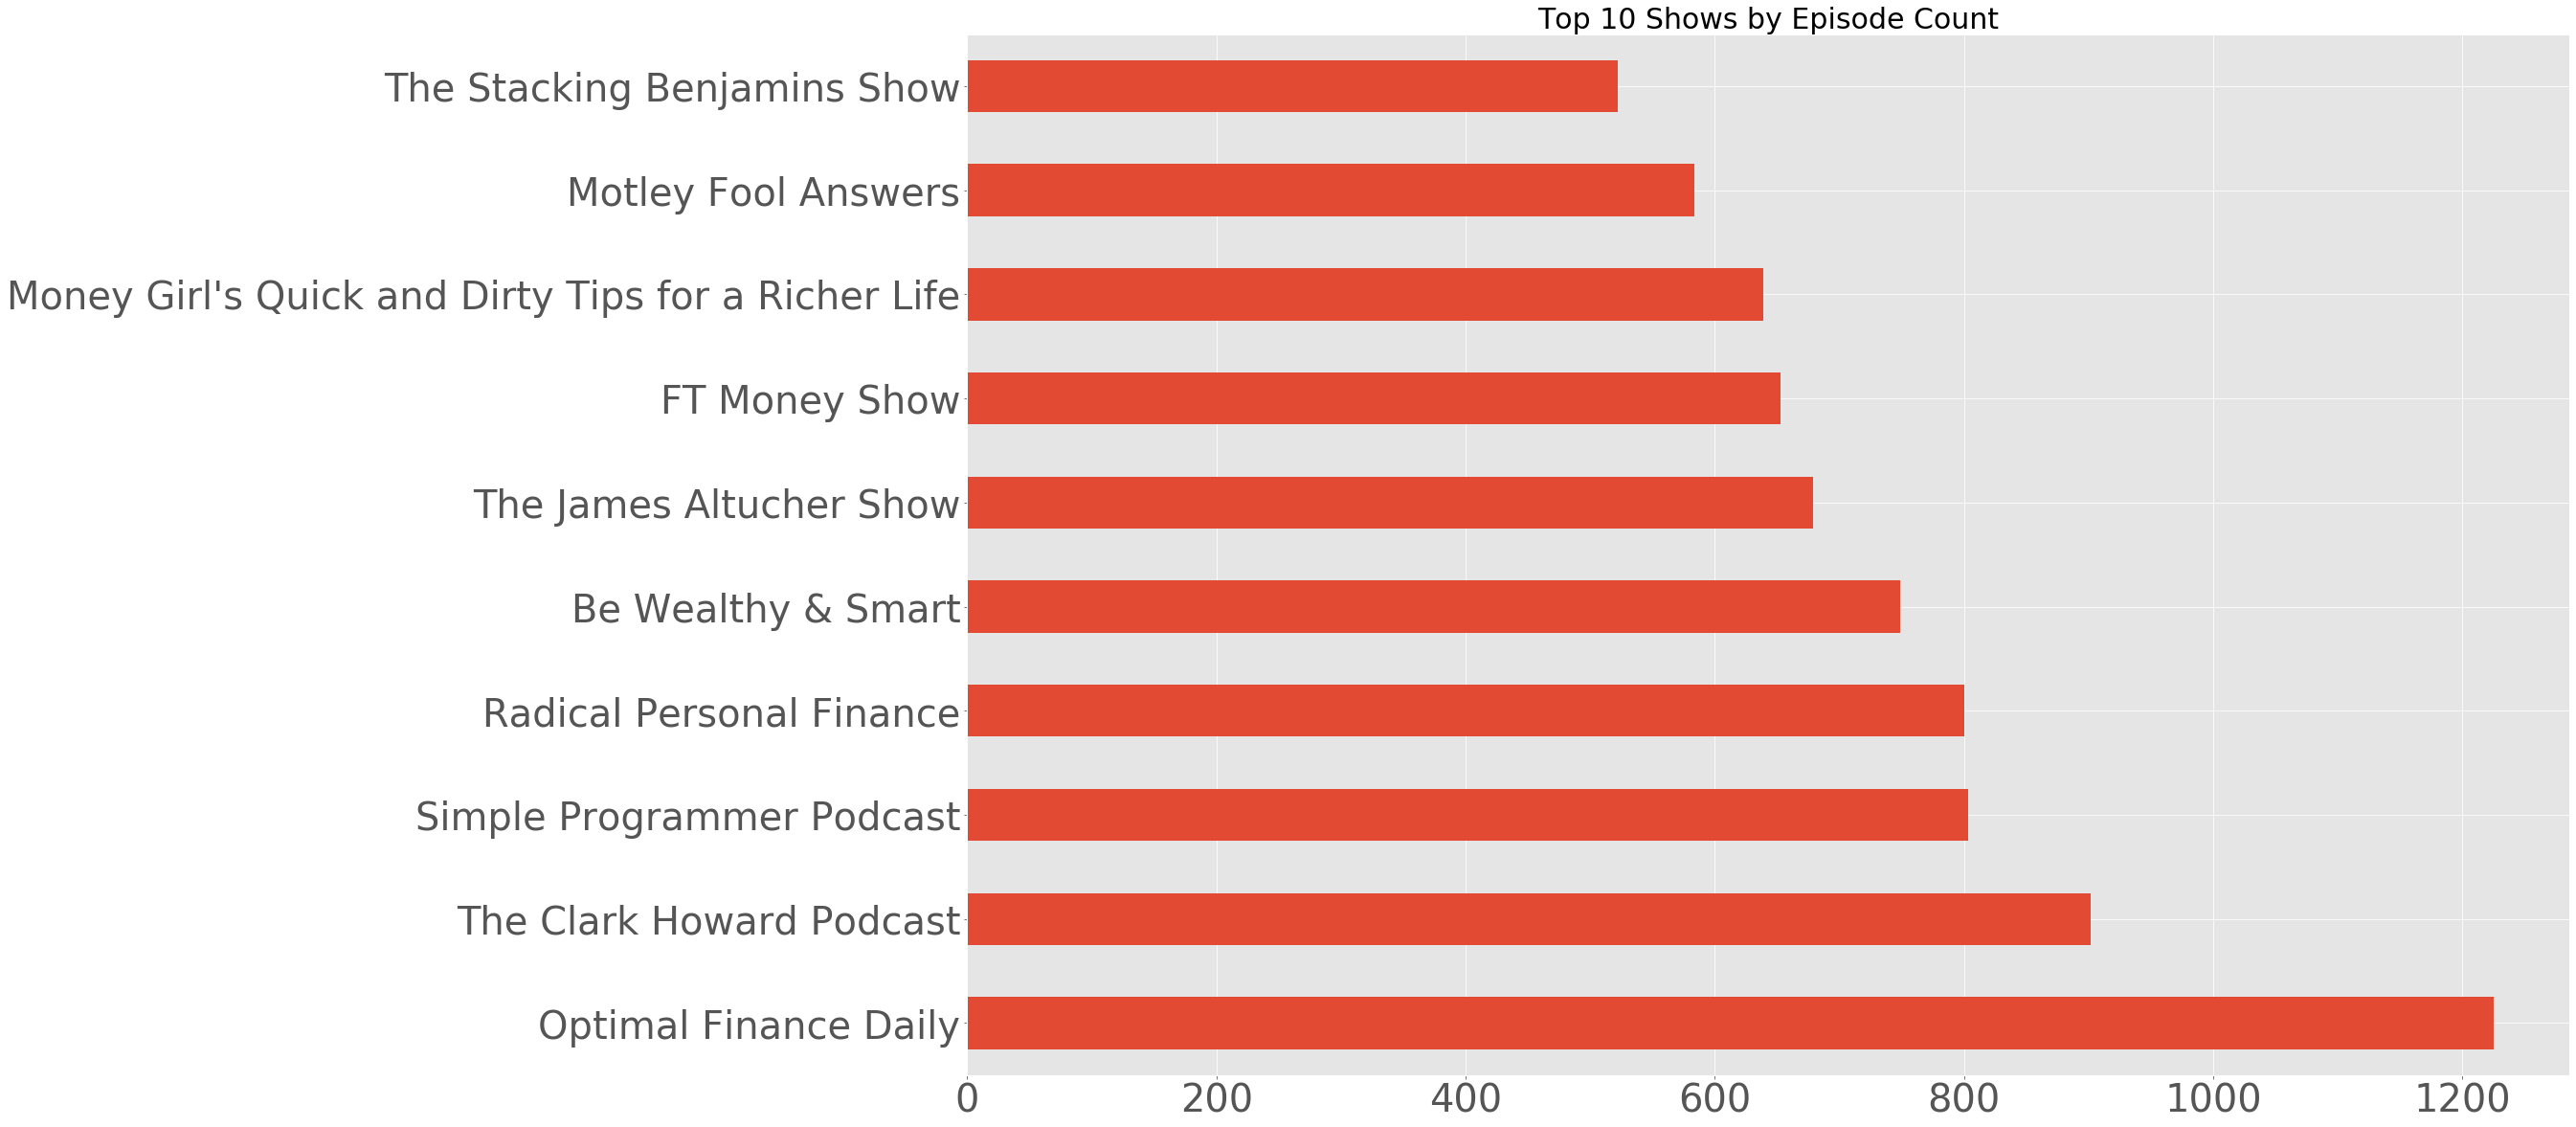

In [17]:
#Visualise top 10 shows by episode count

plt.figure(figsize=(30,20))
ep_count[:10].plot(kind='barh',fontsize=40)
plt.title('Top 10 Shows by Episode Count',fontsize=30)
plt.savefig('Top_Epi_Shows.png');

In [18]:
#subset the episode count data now to keep shows with at least 200 or more episodes

ep_count = ep_count.where(lambda x: x >= 200).dropna()

In [19]:
#change the numbers to int

ep_count.astype(int)

Optimal Finance Daily                                                                                               1225
The Clark Howard Podcast                                                                                             902
Simple Programmer Podcast                                                                                            803
Radical Personal Finance                                                                                             800
Be Wealthy & Smart                                                                                                   749
The James Altucher Show                                                                                              679
FT Money Show                                                                                                        653
Money Girl's Quick and Dirty Tips for a Richer Life                                                                  639
Motley Fool Answers             

In [20]:
ep_count.median() #median episode count at this stage

450.5

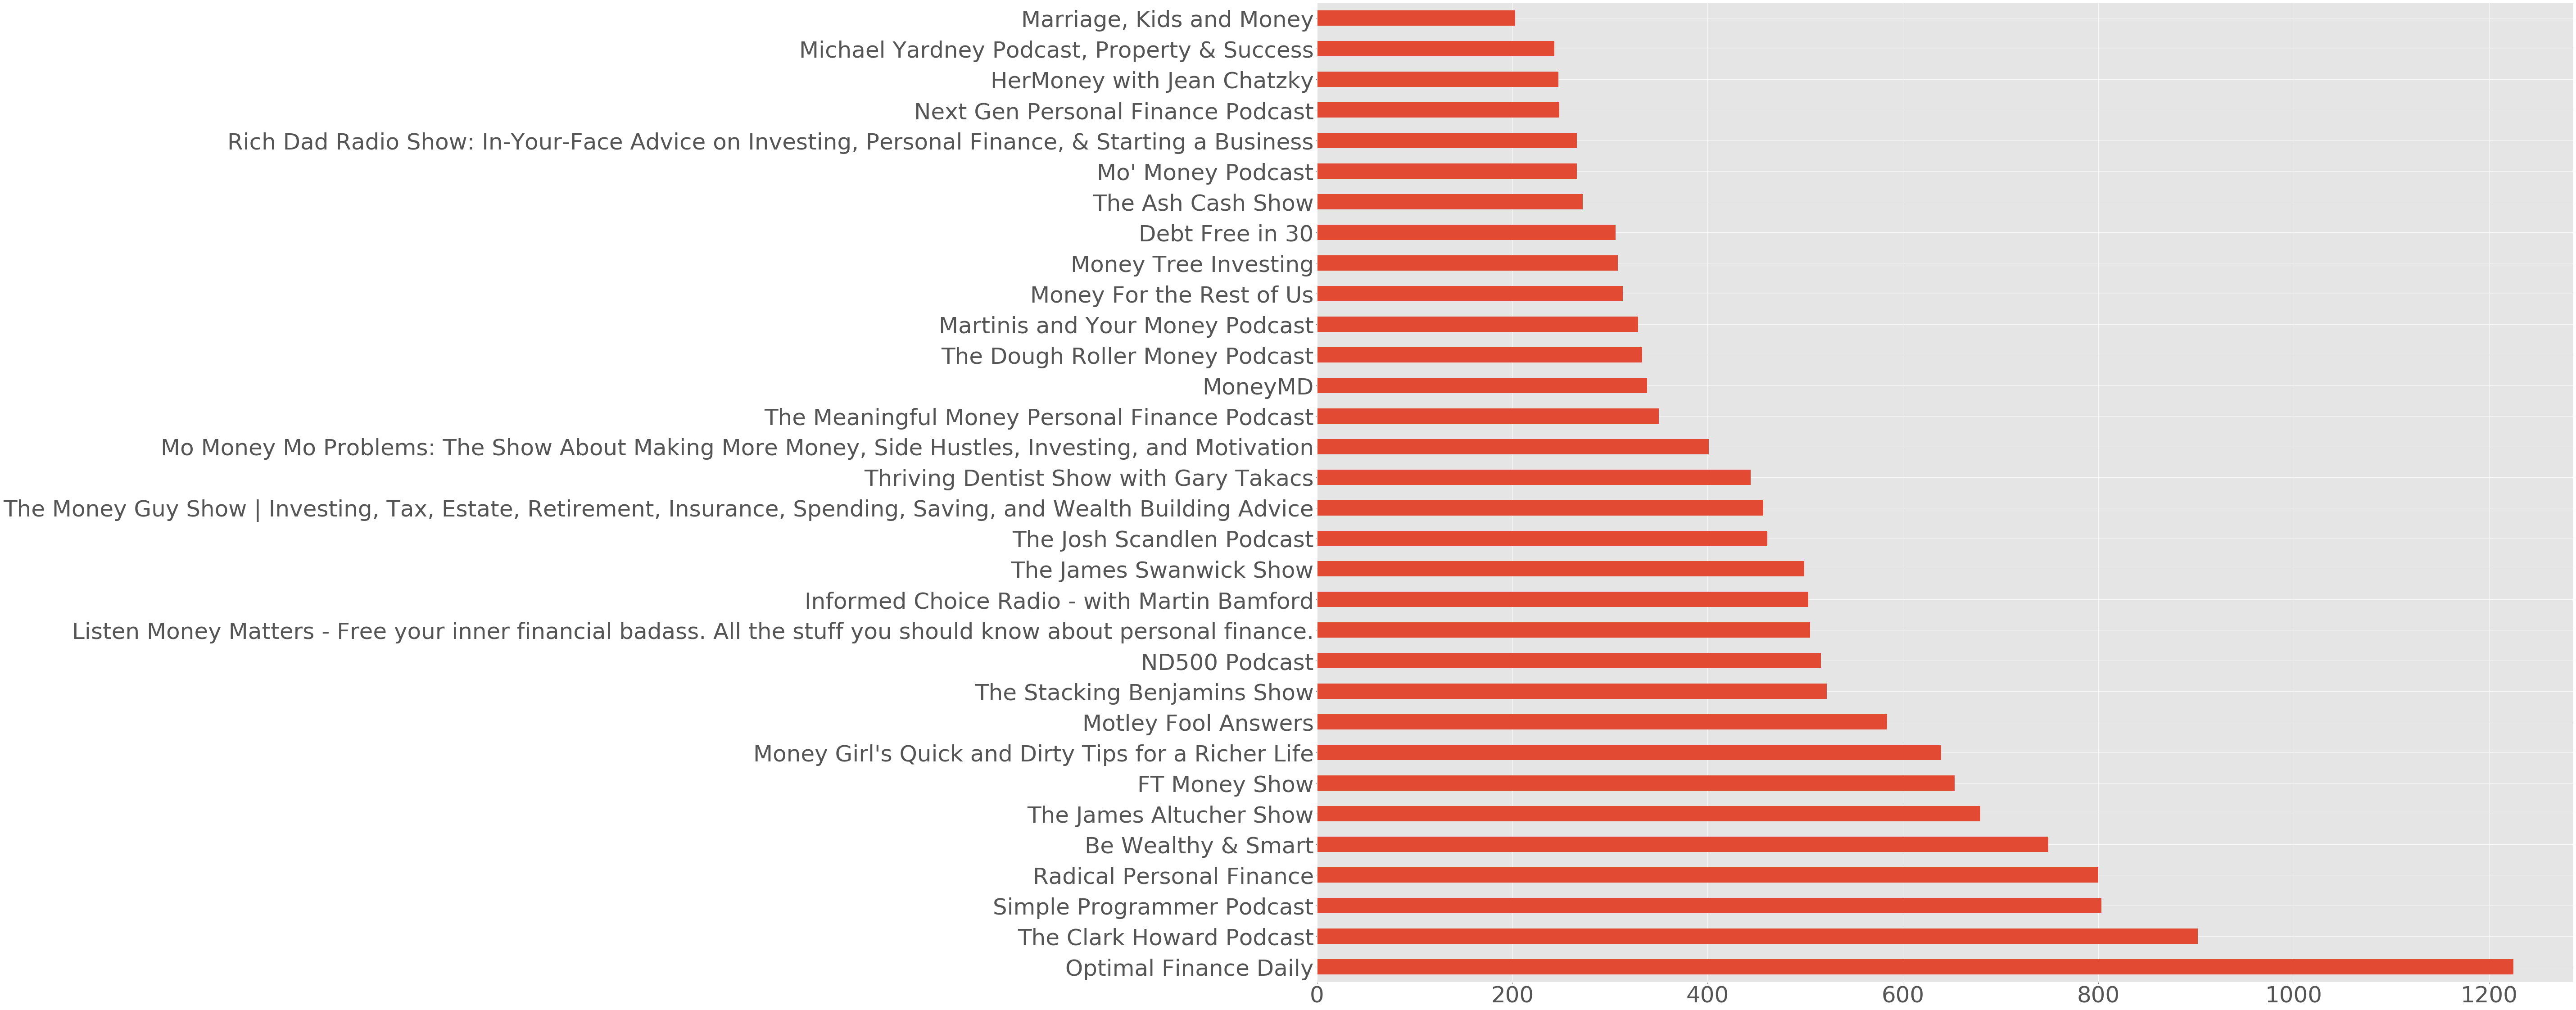

In [21]:
plt.figure(figsize=(50,40))
ep_count.plot(kind='barh',fontsize=50)
plt.savefig('200_Ep.png');

In [22]:
#which are the top 10 shows at this stage?

ep_count[:10]

Optimal Finance Daily                                  1225.0
The Clark Howard Podcast                                902.0
Simple Programmer Podcast                               803.0
Radical Personal Finance                                800.0
Be Wealthy & Smart                                      749.0
The James Altucher Show                                 679.0
FT Money Show                                           653.0
Money Girl's Quick and Dirty Tips for a Richer Life     639.0
Motley Fool Answers                                     584.0
The Stacking Benjamins Show                             522.0
Name: show_name, dtype: float64

In [23]:
#Analysing the top 3 shows by subsetting in a separate dataframe

top_podcasts = pd.DataFrame()
top_podcasts = df[df.apply(lambda x: 'Optimal Finance Daily' in x['show_name'], axis=1)]

top_podcasts_one = pd.DataFrame()
top_podcasts_one = df[df.apply(lambda x: 'The Clark Howard Podcast' in x['show_name'], axis=1)]

top_podcasts_two = pd.DataFrame()
top_podcasts_two = df[df.apply(lambda x: 'Radical Personal Finance' in x['show_name'], axis=1)]

top_podcasts = top_podcasts.append(top_podcasts_one)
top_podcasts = top_podcasts.append(top_podcasts_two)

top_podcasts.to_csv('top_podcasts.csv')

top_podcasts

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
771,6ResySMJy2R7s5snDpcAsu,5,2020-07-16,1224: What To Do When Stocks Go Down by The Fi...,The Finance Twins share what to do when stocks...,https://p.scdn.co/mp3-preview/e7b343590d7edb8a...,Optimal Finance Daily
772,6tOw9tt6czdKcflYo36EPp,7,2020-07-15,1223: [Part 2] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...,https://p.scdn.co/mp3-preview/375b536286583858...,Optimal Finance Daily
773,2teuj9mEBhDbFhvOly8R1b,6,2020-07-14,1222: [Part 1] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...,https://p.scdn.co/mp3-preview/670b84b7d04fb09b...,Optimal Finance Daily
774,4XyEGuRl8ysmOsAnAGGVxY,6,2020-07-13,1221: Seven Crucial Money Rules I Broke and Re...,Claire of Want Less shares seven crucial money...,https://p.scdn.co/mp3-preview/f3ed358bb15dc7f6...,Optimal Finance Daily
775,5oYurjCI9sWNrh19CQREBI,6,2020-07-12,1220: Don't Ignore the Hidden Cost of Your Stu...,Dawn Starks of SimpleMoney shares why you shou...,https://p.scdn.co/mp3-preview/35fe89a7171fc267...,Optimal Finance Daily
...,...,...,...,...,...,...,...
2904,5WmcYCjiBjzjEbuk4rW5cZ,65,2013-07-27,RPF 0006 – How to Afford Anything You Want in ...,"Today’s show is an interview with Paula Pant, ...",https://p.scdn.co/mp3-preview/5a142d03b67a1cec...,Radical Personal Finance
2905,0IKEmFa48F88iFtGgHH3Na,129,2013-07-19,RPF 0004 – How to Save Huge Money on Your Cell...,Today’s show is a comprehensive guide that wil...,https://p.scdn.co/mp3-preview/51423c84a9ac0b23...,Radical Personal Finance
2906,3zqeIQy1kbXS7mtGgYfEO6,81,2013-07-18,RPF 0003 – Book Review and Commentary on “Earl...,In this episode of the Radical Personal Financ...,https://p.scdn.co/mp3-preview/ddaf2aac5b67291d...,Radical Personal Finance
2907,6dKrtTth7OE2DwfPOtTn0I,25,2013-07-16,RPF 0002 – The first question in financial pla...,Where do you start when thinking about financi...,https://p.scdn.co/mp3-preview/fb409ff56e39cc20...,Radical Personal Finance


In [24]:
top_podcasts['ep_duration'].describe() #summary stats for episode durations in this subset

count    2927.000000
mean       31.694226
std        27.513492
min         0.000000
25%         8.000000
50%        35.000000
75%        40.000000
max       216.000000
Name: ep_duration, dtype: float64

In [25]:
top_podcasts['ep_duration'].median() #median episode duration for this set of podcasts

35.0

In [26]:
top_podcasts['ep_release_date'] = pd.to_datetime(top_podcasts['ep_release_date'])
top_podcasts

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
771,6ResySMJy2R7s5snDpcAsu,5,2020-07-16,1224: What To Do When Stocks Go Down by The Fi...,The Finance Twins share what to do when stocks...,https://p.scdn.co/mp3-preview/e7b343590d7edb8a...,Optimal Finance Daily
772,6tOw9tt6czdKcflYo36EPp,7,2020-07-15,1223: [Part 2] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...,https://p.scdn.co/mp3-preview/375b536286583858...,Optimal Finance Daily
773,2teuj9mEBhDbFhvOly8R1b,6,2020-07-14,1222: [Part 1] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...,https://p.scdn.co/mp3-preview/670b84b7d04fb09b...,Optimal Finance Daily
774,4XyEGuRl8ysmOsAnAGGVxY,6,2020-07-13,1221: Seven Crucial Money Rules I Broke and Re...,Claire of Want Less shares seven crucial money...,https://p.scdn.co/mp3-preview/f3ed358bb15dc7f6...,Optimal Finance Daily
775,5oYurjCI9sWNrh19CQREBI,6,2020-07-12,1220: Don't Ignore the Hidden Cost of Your Stu...,Dawn Starks of SimpleMoney shares why you shou...,https://p.scdn.co/mp3-preview/35fe89a7171fc267...,Optimal Finance Daily
...,...,...,...,...,...,...,...
2904,5WmcYCjiBjzjEbuk4rW5cZ,65,2013-07-27,RPF 0006 – How to Afford Anything You Want in ...,"Today’s show is an interview with Paula Pant, ...",https://p.scdn.co/mp3-preview/5a142d03b67a1cec...,Radical Personal Finance
2905,0IKEmFa48F88iFtGgHH3Na,129,2013-07-19,RPF 0004 – How to Save Huge Money on Your Cell...,Today’s show is a comprehensive guide that wil...,https://p.scdn.co/mp3-preview/51423c84a9ac0b23...,Radical Personal Finance
2906,3zqeIQy1kbXS7mtGgYfEO6,81,2013-07-18,RPF 0003 – Book Review and Commentary on “Earl...,In this episode of the Radical Personal Financ...,https://p.scdn.co/mp3-preview/ddaf2aac5b67291d...,Radical Personal Finance
2907,6dKrtTth7OE2DwfPOtTn0I,25,2013-07-16,RPF 0002 – The first question in financial pla...,Where do you start when thinking about financi...,https://p.scdn.co/mp3-preview/fb409ff56e39cc20...,Radical Personal Finance


In [27]:
top_podcasts.to_csv('top_podcasts.csv')

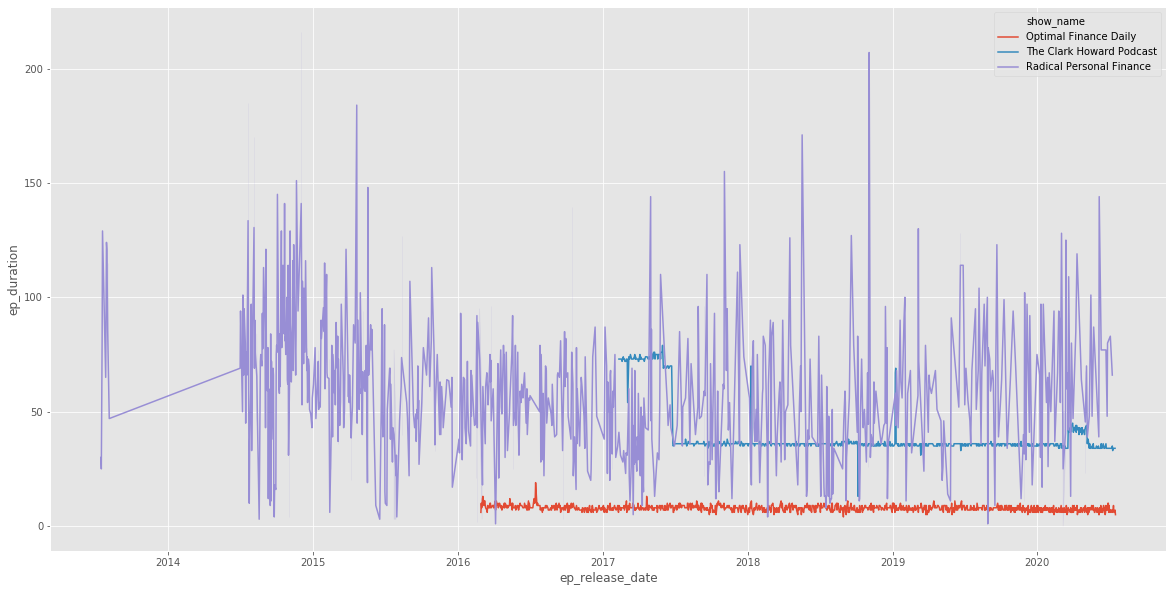

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(top_podcasts['ep_release_date'],top_podcasts['ep_duration'],hue=top_podcasts['show_name']);

### Visualising episode description text

In [28]:
#save uniques words in descriptions and build a wordcloud

ep_wordbank = top_podcasts['ep_description'].unique()
ep_wordbank

array(['The Finance Twins share what to do when stocks go down. Episode 1224: What To Do When Stocks Go Down by The Finance Twins on Index Fund Investing During A Recession Camilo and Francisco Maldonado are the Finance Twins. Most people think money is confusing unless you are an accountant. We used to think that too. After working incredibly hard and catching several lucky breaks, we realized so many people are looking for ways to learn about personal finance, how to manage money, and how to get out of crippling debt. They have tons of tools and resources as well as countless articles that have everything you need to start your path to financial freedom. The original post is located here: https://thefinancetwins.com/what-to-do-when-stocks-down/ Please Rate & Review the Show! Visit Me Online at OLDPodcast.com and in The O.L.D. Facebook Group  ---   Support this podcast: https://anchor.fm/optimal-finance-daily/support',
       "Margo Aaron of That Seems Important shares why good people

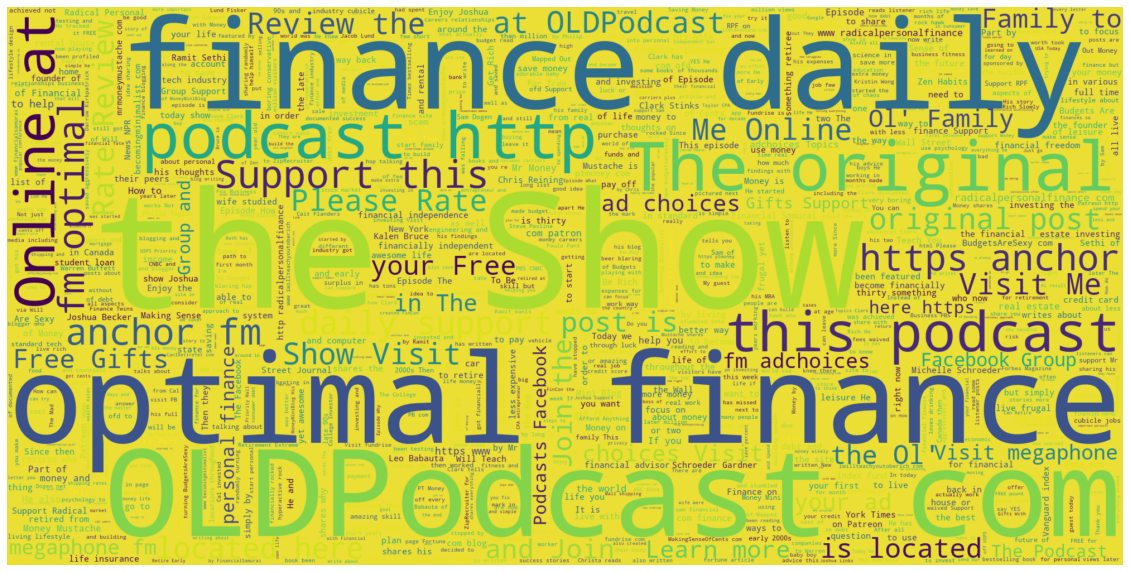

In [29]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='#ebde34', stopwords=stopwords, max_words=1000, 
                      width=2000, height=1000).generate(' '.join(str(word) for word in ep_wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
ep_descr = top_podcasts.reset_index(drop=True)

text = top_podcasts['ep_description'].str.lower()
text = text.str.replace('\d+', '')
text = text.astype('str')
text

771     the finance twins share what to do when stocks...
772     margo aaron of that seems important shares why...
773     margo aaron of that seems important shares why...
774     claire of want less shares seven crucial money...
775     dawn starks of simplemoney shares why you shou...
                              ...                        
2904    today’s show is an interview with paula pant, ...
2905    today’s show is a comprehensive guide that wil...
2906    in this episode of the radical personal financ...
2907    where do you start when thinking about financi...
2908    a brief introduction to the radical personal f...
Name: ep_description, Length: 2927, dtype: object

In [31]:
text.to_dict
text

771     the finance twins share what to do when stocks...
772     margo aaron of that seems important shares why...
773     margo aaron of that seems important shares why...
774     claire of want less shares seven crucial money...
775     dawn starks of simplemoney shares why you shou...
                              ...                        
2904    today’s show is an interview with paula pant, ...
2905    today’s show is a comprehensive guide that wil...
2906    in this episode of the radical personal financ...
2907    where do you start when thinking about financi...
2908    a brief introduction to the radical personal f...
Name: ep_description, Length: 2927, dtype: object

In [85]:
filtered_ep = {k:v for k,v in text.items() if 'bitcoin' in v}
filtered_ep

{1025: "geoffrey bourne with money mini blog shares if bitcoin is a safe retirement strategy. episode : is bitcoin a safe retirement strategy? by geoffrey bourne with money mini blog on alternative investments kalen bruce is the founder of moneyminiblog. his story is simple… he and his wife were $, in debt and became a student of finances to get out. they are now debt-free and building wealth. kalen shares everything he has learned on his blog, writing informative, entertaining, mini blogs to help you with your finances. finances can be intimidating, so he keeps his posts short, sweet, and simple. the original post is located here: http://moneyminiblog.com/investing/bitcoin-retirement/ please rate & review the show! visit me online at oldpodcast.com & in the o.l.d. podcasts facebook group! and join the ol' family to get your free gifts fundrise is the future of real estate investing. visit fundrise.com/ofd to have your first  months of fees waived.  ---   support this podcast: https://

In [86]:
type(filtered_ep)

dict

In [67]:
text.to_csv('ep_csv')

In [25]:
optimal_finance = top_podcasts.loc[top_podcasts['show_name']=='Optimal Finance Daily',
                                  ['ep_release_date','ep_duration','ep_name','ep_description']]
optimal_finance

,ep_release_date,ep_duration,ep_name,ep_description
771,2020-07-16,5,1224: What To Do When Stocks Go Down by The Fi...,The Finance Twins share what to do when stocks...
772,2020-07-15,7,1223: [Part 2] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
773,2020-07-14,6,1222: [Part 1] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
774,2020-07-13,6,1221: Seven Crucial Money Rules I Broke and Re...,Claire of Want Less shares seven crucial money...
775,2020-07-12,6,1220: Don't Ignore the Hidden Cost of Your Stu...,Dawn Starks of SimpleMoney shares why you shou...
...,...,...,...,...
1991,2016-03-03,12,004: The Surprising Math of a Dream Vacation w...,How you can afford your dream vacation in the ...
1992,2016-03-02,9,003: Key Question: How Much is Enough by Leo B...,Do you already have enough? Episode 3: Key Que...
1993,2016-03-01,8,002: Which Part of the Money Wave Do You Surf ...,Where are you in the financial tide? Episode 2...
1994,2016-02-29,10,001: The 5 Groups to Blame for our Financial I...,"Today, a delightful foray into the world of wh..."


In [26]:
optimal_finance['ep_release_date'] = pd.to_datetime(optimal_finance['ep_release_date'])
optimal_finance

,ep_release_date,ep_duration,ep_name,ep_description
771,2020-07-16,5,1224: What To Do When Stocks Go Down by The Fi...,The Finance Twins share what to do when stocks...
772,2020-07-15,7,1223: [Part 2] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
773,2020-07-14,6,1222: [Part 1] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
774,2020-07-13,6,1221: Seven Crucial Money Rules I Broke and Re...,Claire of Want Less shares seven crucial money...
775,2020-07-12,6,1220: Don't Ignore the Hidden Cost of Your Stu...,Dawn Starks of SimpleMoney shares why you shou...
...,...,...,...,...
1991,2016-03-03,12,004: The Surprising Math of a Dream Vacation w...,How you can afford your dream vacation in the ...
1992,2016-03-02,9,003: Key Question: How Much is Enough by Leo B...,Do you already have enough? Episode 3: Key Que...
1993,2016-03-01,8,002: Which Part of the Money Wave Do You Surf ...,Where are you in the financial tide? Episode 2...
1994,2016-02-29,10,001: The 5 Groups to Blame for our Financial I...,"Today, a delightful foray into the world of wh..."


In [28]:
optimal_finance.index = optimal_finance['ep_release_date']
del optimal_finance['ep_release_date']
optimal_finance

,ep_duration,ep_name,ep_description
ep_release_date,,,
2020-07-16,5,1224: What To Do When Stocks Go Down by The Fi...,The Finance Twins share what to do when stocks...
2020-07-15,7,1223: [Part 2] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
2020-07-14,6,1222: [Part 1] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
2020-07-13,6,1221: Seven Crucial Money Rules I Broke and Re...,Claire of Want Less shares seven crucial money...
2020-07-12,6,1220: Don't Ignore the Hidden Cost of Your Stu...,Dawn Starks of SimpleMoney shares why you shou...
...,...,...,...
2016-03-03,12,004: The Surprising Math of a Dream Vacation w...,How you can afford your dream vacation in the ...
2016-03-02,9,003: Key Question: How Much is Enough by Leo B...,Do you already have enough? Episode 3: Key Que...
2016-03-01,8,002: Which Part of the Money Wave Do You Surf ...,Where are you in the financial tide? Episode 2...


In [30]:
this_year = optimal_finance['2020']
this_year

,ep_duration,ep_name,ep_description
ep_release_date,,,
2020-07-16,5,1224: What To Do When Stocks Go Down by The Fi...,The Finance Twins share what to do when stocks...
2020-07-15,7,1223: [Part 2] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
2020-07-14,6,1222: [Part 1] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...
2020-07-13,6,1221: Seven Crucial Money Rules I Broke and Re...,Claire of Want Less shares seven crucial money...
2020-07-12,6,1220: Don't Ignore the Hidden Cost of Your Stu...,Dawn Starks of SimpleMoney shares why you shou...
...,...,...,...
2020-01-05,7,1031: How to Handle Feeling Overworked & Overw...,Paula Pant of Afford Anything shares how to ha...
2020-01-04,6,1030: The Five Biggest Myths About Saving Mone...,Erik Carter with Financial Finesse shares the ...
2020-01-03,6,1029: Three Fund Portfolio - Investing Made Ea...,The Finance Twins on investing made easy with ...


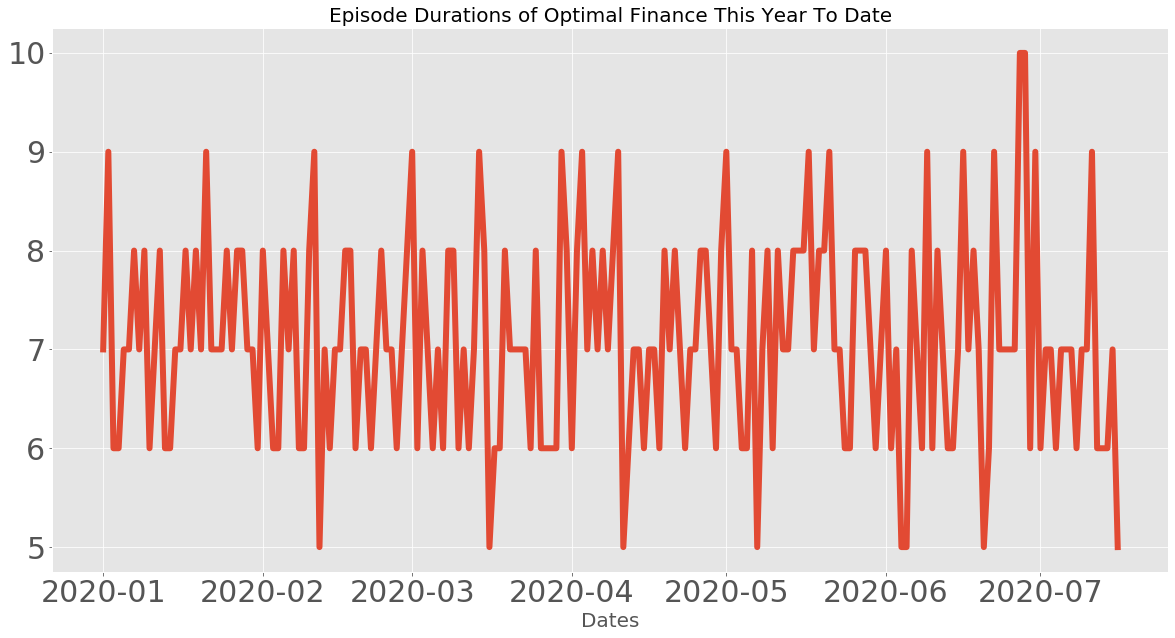

In [74]:
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30
plt.rcParams['lines.linewidth'] = 6
plt.figure(figsize=(20,10))
plt.plot(this_year['ep_duration'])
plt.xlabel('Dates',fontsize=20)
plt.title('Episode Durations of Optimal Finance This Year To Date',fontsize=20)
plt.savefig('opt_ep_2020.png');

In [73]:
last_year = optimal_finance['2019']
last_year

,ep_duration,ep_name,ep_description
ep_release_date,,,
2019-12-31,9,1026: What Will You Do When You're Retired? by...,Darrow Kirkpatrick of Can I Retire Yet asks wh...
2019-12-30,6,1025: Frugal vs Minimal by Claire of Want Less...,Claire of Want Less shares her thoughts on fru...
2019-12-29,7,"1024: [Part 2] 14 Months, 18 Countries, $10,00...",Craig Stephens of Retire Before Dad shares how...
2019-12-28,6,"1023: [Part 1] 14 Months, 18 Countries, $10,00...",Craig Stephens of Retire Before Dad shares how...
2019-12-27,8,1022: 11 Tips From My New Millionaire Friend b...,J. Money of Budgets Are Sexy shares 11 tips fr...
...,...,...,...
2019-01-07,6,746: Want to Stop Spending Money? Get Busy by ...,J Money of Budgets Are Sexy shares how you can...
2019-01-04,10,"745: 9 Ways to Need Less Money: Stress Less, E...",Lori Deschene of Tiny Buddha shares 9 ways to ...
2019-01-03,8,744: The Values of Value Investing by Vitaliy ...,Vitaliy Katsenelson of Contrarian Edge shares ...


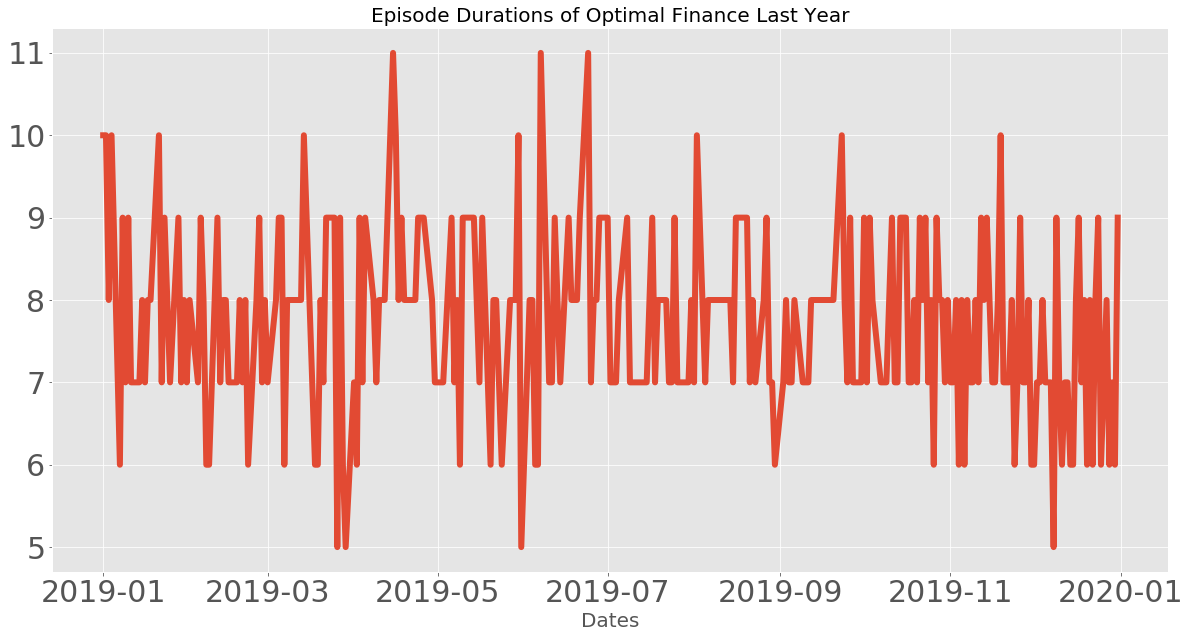

In [76]:
plt.rcParams['lines.linewidth'] = 6
plt.figure(figsize=(20,10))
plt.plot(last_year['ep_duration'])
plt.xlabel('Dates',fontsize=20)
plt.title('Episode Durations of Optimal Finance Last Year',fontsize=20)
plt.savefig('opt_ep_2019.png');